In [1]:
library(tidyverse)
library(forecast)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

Warning message:
"package 'tibble' was built under R version 4.1.2"
Warning message:
"package 'tidyr' was built under R version 4.1.2"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'forecast' was built under R version 4.1.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [27]:
df <- read.csv("../data/processed/clean.csv")

In [39]:
df |> filter (year >= 1950) |> summary()

      id              location           country              city          
 Length:6182        Length:6182        Length:6182        Length:6182       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
      lat             long             alt              year     
 Min.   :24.34   Min.   :-77.04   Min.   :   0.0   Min.   :1950  
 1st Qu.:34.34   1st Qu.:130.98   1st Qu.:   5.7   1st Qu.:1972  
 Median :35.54   Median :136.19   Median :  26.5   Median :1987  
 Mean   :36.84   Mean   :126.61   Mean   :  77.2   Mean   :1987  
 3rd Qu.:39.70   3rd Qu.:140.10   3rd Qu.:  51.1   3rd

In [5]:
df_kyoto <- df |> 
  filter(city == "Kyoto") |> 
  filter(alt == 44)

df_liestal <- df |> 
  filter(city == "Liestal")

In [8]:
# separate train test manually by year

train_kyoto <- df_kyoto |> 
  filter(year < 2015) |> 
  arrange(year) |> 
  select(bloom_doy)

test_kyoto <- df_kyoto |> 
  filter(year >= 2015) |> 
  arrange(year)

train_liestal <- df_liestal |> 
  filter(year < 2015) |> 
  arrange(year) |> 
  select(bloom_doy)

test_liestal <- df_liestal |> 
  filter(year >= 2015) |> 
  arrange(year, bloom_doy)



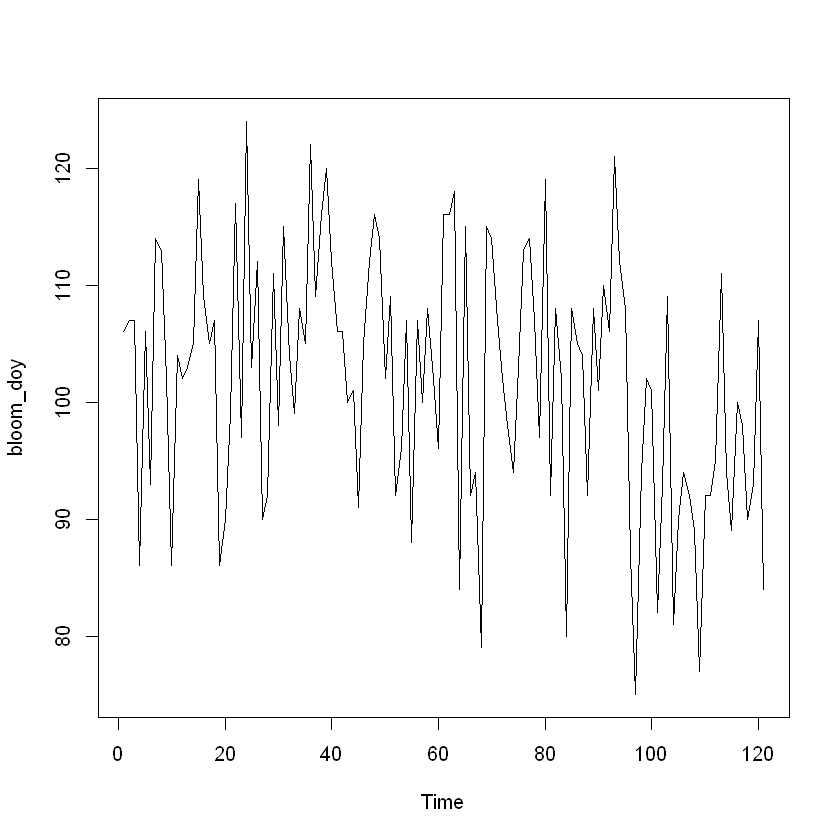

In [10]:
train_kyoto_ts <- ts(train_kyoto, frequency = 1)
train_liestal_ts <- ts(train_liestal, frequency = 1)
plot(train_liestal_ts)

In [12]:
model_arima_liestal <- auto.arima(train_liestal_ts)
model_arima_kyoto <- auto.arima(train_kyoto_ts)

In [13]:
summary(model_arima_liestal)

Series: train_liestal_ts 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.9172
s.e.   0.0369

sigma^2 = 108.6:  log likelihood = -451.95
AIC=907.89   AICc=908   BIC=913.47

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.8704821 10.33426 8.102987 -1.931857 8.291846 0.7445317
                   ACF1
Training set 0.05486383

In [14]:
pred <- forecast(model_arima_liestal, h=7)

In [15]:
pred

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
122       94.96042 81.60570 108.3151 74.53614 115.3847
123       94.96042 81.56005 108.3608 74.46633 115.4545
124       94.96042 81.51456 108.4063 74.39675 115.5241
125       94.96042 81.46922 108.4516 74.32741 115.5934
126       94.96042 81.42403 108.4968 74.25830 115.6625
127       94.96042 81.37900 108.5418 74.18943 115.7314
128       94.96042 81.33411 108.5867 74.12078 115.8001

In [64]:
test_kyoto

id,location,country,city,lat,long,alt,year,bloom_date,bloom_doy,tmax,tmin,prcp,agdd_winter,tmax_winter,tmin_winter,prcp_winter,co2_percapita,co2_emission
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JA000047759,Japan/Kyoto,Japan,Kyoto,35.01198,135.6761,44,2015,2015-04-03,93,21.44385,12.59741,5.566209,238.35,9.18318,1.3602564,28.63594,9.5589,1223396445
JA000047759,Japan/Kyoto,Japan,Kyoto,35.01198,135.6761,44,2016,2016-04-04,95,22.24157,12.65389,5.046429,319.60,11.59595,2.6403711,30.19587,9.4215,1203717880
JA000047759,Japan/Kyoto,Japan,Kyoto,35.01198,135.6761,44,2017,2017-04-09,99,20.91285,11.71786,3.837466,292.95,10.42070,1.9814530,21.24693,9.3184,1188122842
JA000047759,Japan/Kyoto,Japan,Kyoto,35.01198,135.6761,44,2018,2018-03-30,89,21.87450,12.58351,4.839612,242.25,9.06298,0.5109806,10.87327,8.9893,1143457876
JA000047759,Japan/Kyoto,Japan,Kyoto,35.01198,135.6761,44,2019,2019-04-05,95,21.68782,12.93538,3.734444,270.05,10.76216,2.5435574,13.22773,8.7177,1105929335
JA000047759,Japan/Kyoto,Japan,Kyoto,35.01198,135.6761,44,2020,2020-04-01,92,22.13423,13.45000,4.700639,337.85,11.66057,3.4481209,17.63576,8.1499,1030775384
JA000047759,Japan/Kyoto,Japan,Kyoto,35.01198,135.6761,44,2021,2021-03-26,85,22.26696,13.01016,5.623907,219.65,11.31853,1.9707576,17.73449,NA,NA


In [16]:
library(fpp2)

Warning message:
"package 'fpp2' was built under R version 4.1.2"
-- Attaching packages -------------------------------------------------------------------------------------- fpp2 2.4 --

v fma       2.4     v expsmooth 2.3

Warning message:
"package 'fma' was built under R version 4.1.2"
Warning message:
"package 'expsmooth' was built under R version 4.1.2"




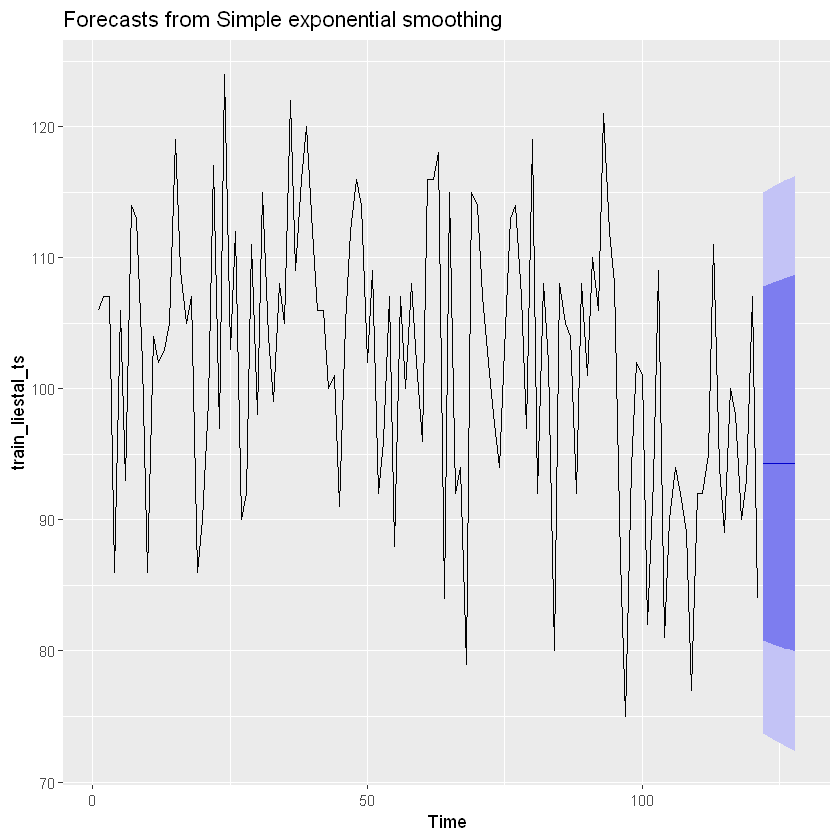

In [25]:
ses_liestal <- ses(train_liestal_ts,
                alpha = .15,
                h = 7)
autoplot(ses_liestal)

In [26]:
ses_liestal

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
122        94.3077 80.81635 107.7991 73.67446 114.9409
123        94.3077 80.66542 107.9500 73.44363 115.1718
124        94.3077 80.51613 108.0993 73.21532 115.4001
125        94.3077 80.36845 108.2470 72.98946 115.6259
126        94.3077 80.22232 108.3931 72.76596 115.8494
127        94.3077 80.07768 108.5377 72.54477 116.0706
128        94.3077 79.93450 108.6809 72.32579 116.2896